<a href="https://colab.research.google.com/github/GowriShankarAllam/email_spam_detection/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull()
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


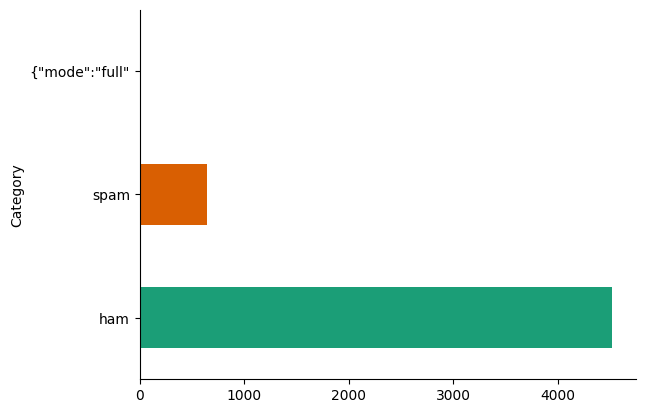

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
%matplotlib inline

In [ ]:
x=df['Message']
y=df['Category']
x_train, x_test,y_train, y_test = train_test_split(df["Message"],df["Category"],test_size = 0.2,random_state=42)

In [ ]:
cv=CountVectorizer()
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)
print(x_test_vectorized)

  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC

model = SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
lg=SVC()
lg.fit(x_train_vectorized,y_train)

SVC()

In [ ]:
y_predect=lg.predict(x_test_vectorized)
y_predect

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
precision = precision_score(y_test, y_predect, pos_label='spam')
recall = recall_score(y_test, y_predect, pos_label='spam')
f1 = f1_score(y_test, y_predect, pos_label='spam')

print(f'Precision: {precision:}')
print(f'Recall: {recall:}')
print(f'F1 score: {f1:}')

Precision: 0.9824561403508771
Recall: 0.8115942028985508
F1 score: 0.888888888888889


In [ ]:
accuracy = accuracy_score(y_test, y_predect)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.9728682170542635
